# Machine Learning in TensorFlo  w

### Brief Review of Machine Learning

In supervised learning, parametric models are those where the model is a function of a fixed form with a number of unknown _parameters_.  Together with a loss function and a training set, an optimizer can select parameters to minimize the loss with respect to the training set.  Common optimizers include stochastic gradient descent.  It tweaks the parameters slightly to move the loss "downhill" due to a small batch of examples from the training set.

### Linear & Logistic Regression

You've likely seen linear regression before.  In linear regression, we fit a line (technically, hyperplane) that predicts a target variable, $y$, based on some features $x$.  The form of this model is affine (even if we call it "linear"):  

$$y_{hat} = xW + b$$

where $W$ and $b$ are weights and an offset, respectively, and are the parameters of this parametric model.  The loss function that the optimizer uses to fit these parameters is the squared error ($||\cdots||_2$) between the prediction and the ground truth in the training set.

You've also likely seen logistic regression, which is tightly related to linear regression.  Logistic regression also fits a line - this time separating the positive and negative examples of a binary classifier.  The form of this model is similar: 

$$y_{hat} = \sigma(xW + b)$$

where again $W$ and $b$ are the parameters of this model, and $\sigma$ is the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) which maps un-normalized scores ("logits") to values $\hat{y} \in [0,1]$ that represent probabilities. The loss function that the optimizer uses to fit these parameters is the [cross entropy](../information_theory.ipynb) between the prediction and the ground truth in the training set.

This pattern of an affine transform, $xW + b$, occurs over and over in machine learning.

### Preliminaries...

Before we do anything else, let's load our data and take a quick look at it.  In this example, we're going to build a (very) simple binary classifier based on two floating point features.

In [1]:
import data
%matplotlib inline
from matplotlib import pyplot as plt

(1000, 2)


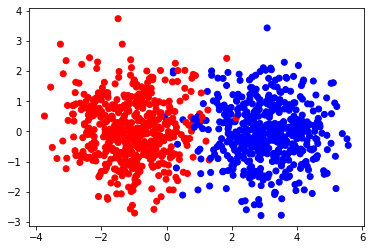

In [2]:
X_train, y_train, X_test, y_test = data.generate_data(1000, 10)
print(X_train.shape)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='bwr');

### Training Logistic Regression

It's clear that the data is separable with a vertical line.  The simplest model we can use for this data is logistic regression.  Let's do that.

In [4]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

1.14.0


In [6]:
#####
## MAKE SURE YOU UNDERSTAND THIS CODE!!
##
## Look up keras.Sequential and keras.layers.Dense!
##
## You will need to use them to write your own model down below!
#####

# Sequential models are ones where the set of specified layers are stacked each on top of the previous.
linear_model = keras.Sequential([
    # Dense is an affine (xW + b) layer followed by an element wise nonlinearity.
    keras.layers.Dense(1, activation='sigmoid')
])

# adam optimizer is a fancier version of gradient descent.  You can read more about it here: https://arxiv.org/pdf/1412.6980.pdf
linear_model.compile(optimizer='adam',
              loss='binary_crossentropy',  # From information theory notebooks.
              metrics=['accuracy'])        # What metric to output as we train.

linear_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1000/1000 [==============================] - 0s 88us/sample - loss: 2.6771 - acc: 0.1290
Epoch 2/100
1000/1000 [==============================] - 0s 31us/sample - loss: 2.6124 - acc: 0.1290
Epoch 3/100
1000/1000 [==============================] - 0s 28us/sample - loss: 2.5482 - acc: 0.1290
Epoch 4/100
1000/1000 [==============================] - 0s 32us/sample - loss: 2.4846 - acc: 0.1270
Epoch 5/100
1000/1000 [==============================] - 0s 39us/sample - loss: 2.4207 - acc: 0.1250
Epoch 6/100
1000/1000 [==============================] - 0s 35us/sample - loss: 2.3585 - acc: 0.1250
Epoch 7/100
1000/1000 [==============================] - 0s 32us/sample - loss: 2.2960 - acc: 0.1210
Epoch 8/100
1000/1000 [==============================] - 0s 37us/sample - loss: 2.2345 - acc: 0.1200
Epoch 9/100
1000/1000 [==============================] - 0s 35us/sample - loss: 2.1738 - acc: 0.1210
Epoch 10/100
1000/1000 [==============================] - 0s 34us/sample - loss: 2.1131 - a

1000/1000 [==============================] - 0s 27us/sample - loss: 0.2817 - acc: 0.9730
Epoch 82/100
1000/1000 [==============================] - 0s 26us/sample - loss: 0.2769 - acc: 0.9730
Epoch 83/100
1000/1000 [==============================] - 0s 26us/sample - loss: 0.2722 - acc: 0.9730
Epoch 84/100
1000/1000 [==============================] - 0s 26us/sample - loss: 0.2677 - acc: 0.9730
Epoch 85/100
1000/1000 [==============================] - 0s 27us/sample - loss: 0.2633 - acc: 0.9730
Epoch 86/100
1000/1000 [==============================] - 0s 27us/sample - loss: 0.2590 - acc: 0.9730
Epoch 87/100
1000/1000 [==============================] - 0s 28us/sample - loss: 0.2548 - acc: 0.9740
Epoch 88/100
1000/1000 [==============================] - 0s 30us/sample - loss: 0.2508 - acc: 0.9740
Epoch 89/100
1000/1000 [==============================] - 0s 26us/sample - loss: 0.2469 - acc: 0.9740
Epoch 90/100
1000/1000 [==============================] - 0s 28us/sample - loss: 0.2431 - acc: 

**Hint:** You should expect to see an initial loss here of 0.3 - 1.2.  This is because a well-initialized random classifier tends to output a uniform distribution.  For each example in the batch, we either compute the cross-entropy loss of the label (`[1, 0]` or `[0, 1]`) against the model's output (`~[0.5, 0.5]`).  Both cases result in $-\lg(0.5) = lg(2) = 1.0$.

Of course, your random classifier won't output exactly uniform distributions (it's random after all), but you should anticipate it being pretty close.  If it's not, your initialization may be broken and make it hard for your network to learn.

**[Optional]** Some technical details... if your randomly initialized network is outputting very confident predictions, the loss computed may be very large while at the same time the sigmoids in the network are likely in saturation, quickly shrinking gradients.  The result is that you make tiny updates in the face of a huge loss.

Let's use our model to make predictions on the test set:

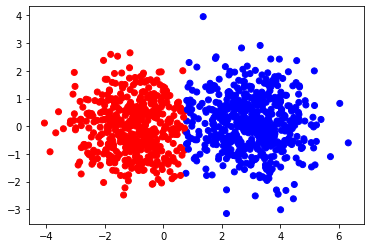

In [7]:
predictions = linear_model.predict(X_test)
plt.scatter(X_test[:,0], X_test[:,1], c=predictions[:,0]>0.5, cmap='bwr')

### But what about a harder problem?

The case above, the data was linearly separable making it susceptible to a linear classifier.

But what if you had data that looked more like this?

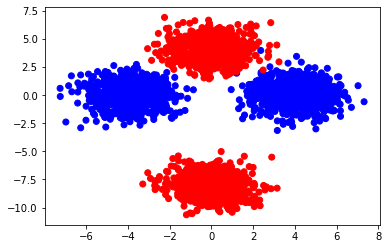

In [8]:
X_train, y_train, X_test, y_test = data.generate_non_linear_data(1000, 10)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='bwr')

In [9]:
linear_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1000/1000 [==============================] - 0s 34us/sample - loss: 1.2260 - acc: 0.6550
Epoch 2/100
1000/1000 [==============================] - 0s 33us/sample - loss: 1.1724 - acc: 0.6550
Epoch 3/100
1000/1000 [==============================] - 0s 33us/sample - loss: 1.1304 - acc: 0.6520
Epoch 4/100
1000/1000 [==============================] - 0s 33us/sample - loss: 1.0909 - acc: 0.6530
Epoch 5/100
1000/1000 [==============================] - 0s 32us/sample - loss: 1.0530 - acc: 0.6520
Epoch 6/100
1000/1000 [==============================] - 0s 32us/sample - loss: 1.0169 - acc: 0.6480
Epoch 7/100
1000/1000 [==============================] - 0s 34us/sample - loss: 0.9832 - acc: 0.6520
Epoch 8/100
1000/1000 [==============================] - 0s 35us/sample - loss: 0.9518 - acc: 0.6480
Epoch 9/100
1000/1000 [==============================] - 0s 33us/sample - loss: 0.9213 - acc: 0.6490
Epoch 10/100
1000/1000 [==============================] - 0s 32us/sample - loss: 0.8937 - a

1000/1000 [==============================] - 0s 26us/sample - loss: 0.6678 - acc: 0.5000
Epoch 82/100
1000/1000 [==============================] - 0s 27us/sample - loss: 0.6678 - acc: 0.4990
Epoch 83/100
1000/1000 [==============================] - 0s 28us/sample - loss: 0.6679 - acc: 0.4910
Epoch 84/100
1000/1000 [==============================] - 0s 29us/sample - loss: 0.6678 - acc: 0.4860
Epoch 85/100
1000/1000 [==============================] - 0s 28us/sample - loss: 0.6679 - acc: 0.4830
Epoch 86/100
1000/1000 [==============================] - 0s 27us/sample - loss: 0.6679 - acc: 0.4850
Epoch 87/100
1000/1000 [==============================] - 0s 27us/sample - loss: 0.6679 - acc: 0.4920
Epoch 88/100
1000/1000 [==============================] - 0s 27us/sample - loss: 0.6678 - acc: 0.4960
Epoch 89/100
1000/1000 [==============================] - 0s 29us/sample - loss: 0.6679 - acc: 0.5030
Epoch 90/100
1000/1000 [==============================] - 0s 27us/sample - loss: 0.6678 - acc: 

Again, let's make predictions on the test set...

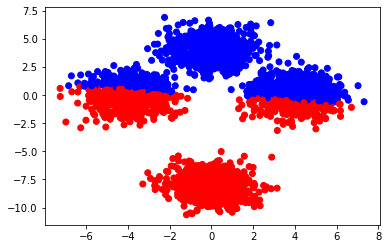

In [10]:
predictions = linear_model.predict(X_test)
plt.scatter(X_test[:,0], X_test[:,1], c=predictions[:,0]>0.5, cmap='bwr')

That isn't very good!

### Building a deeper network

Ok, now it's your turn.  Build a deeper neural network below.  Try to achieve a loss less than 0.05.  Initialization is random, but try to make it happen "almost" always.

In [26]:
W = 10

deep_model = keras.Sequential([
    # Hint, try "relu" as your activation function.
    # relu(z) = max(0, z).
    #     Note that: relu(z) = z when z > 0
    #                relu(z) = 0 otherwise
    #
    # See https://en.wikipedia.org/wiki/File:Ramp_function.svg
    #
    # This is the most common nonlinearity for the main body of the network as its derivative is
    # either 0 or 1, depending on the value of z.
    #
    # This means that the gradient doesn't tend to explode or vanish as you multiply more partial
    # derivative terms together.
    #
    # For this problem...
    #
    # Try toying with the trade offs between more layers vs deeper networks:
    #   How few layers can you get away with?
    #   Conversely, how small hidden vectors can you use if you use more layers?


    ### YOUR CODE HERE
    keras.layers.Dense(W, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(W, activation='relu'),
    keras.layers.Dense(W, activation='relu'),
    
    ### END YOUR CODE
    
    # Think about why you still use a sigmoid at the top of your network.
#     out = keras.layers.Dense(1, activation='sigmoid')
    keras.layers.Dense(1, activation='sigmoid')
])

deep_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

deep_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1000/1000 [==============================] - 0s 218us/sample - loss: 0.6466 - acc: 0.5310
Epoch 2/100
1000/1000 [==============================] - 0s 45us/sample - loss: 0.4711 - acc: 0.7570
Epoch 3/100
1000/1000 [==============================] - 0s 44us/sample - loss: 0.3515 - acc: 0.9180
Epoch 4/100
1000/1000 [==============================] - 0s 48us/sample - loss: 0.2502 - acc: 0.9860
Epoch 5/100
1000/1000 [==============================] - 0s 50us/sample - loss: 0.1603 - acc: 0.9990
Epoch 6/100
1000/1000 [==============================] - 0s 45us/sample - loss: 0.0957 - acc: 0.9990
Epoch 7/100
1000/1000 [==============================] - 0s 48us/sample - loss: 0.0577 - acc: 1.0000
Epoch 8/100
1000/1000 [==============================] - 0s 43us/sample - loss: 0.0369 - acc: 1.0000
Epoch 9/100
1000/1000 [==============================] - 0s 45us/sample - loss: 0.0258 - acc: 1.0000
Epoch 10/100
1000/1000 [==============================] - 0s 48us/sample - loss: 0.0193 - 

1000/1000 [==============================] - 0s 41us/sample - loss: 4.9478e-04 - acc: 1.0000
Epoch 80/100
1000/1000 [==============================] - 0s 45us/sample - loss: 4.8594e-04 - acc: 1.0000
Epoch 81/100
1000/1000 [==============================] - 0s 45us/sample - loss: 4.7771e-04 - acc: 1.0000
Epoch 82/100
1000/1000 [==============================] - 0s 42us/sample - loss: 4.5840e-04 - acc: 1.0000
Epoch 83/100
1000/1000 [==============================] - 0s 44us/sample - loss: 4.4974e-04 - acc: 1.0000
Epoch 84/100
1000/1000 [==============================] - 0s 46us/sample - loss: 4.3662e-04 - acc: 1.0000
Epoch 85/100
1000/1000 [==============================] - 0s 57us/sample - loss: 4.2207e-04 - acc: 1.0000
Epoch 86/100
1000/1000 [==============================] - 0s 41us/sample - loss: 4.1730e-04 - acc: 1.0000
Epoch 87/100
1000/1000 [==============================] - 0s 44us/sample - loss: 4.1447e-04 - acc: 1.0000
Epoch 88/100
1000/1000 [==============================] - 0

In [28]:
# Alternative Approach  

import tensorflow as tf
from tensorflow import keras

n_cols = X_train.shape[1]

deep_model =  keras.Sequential()
deep_model.add(keras.layers.Dense(10, activation='relu', input_shape=(n_cols,)))
deep_model.add(keras.layers.Dense(10, activation='relu'))
deep_model.add(keras.layers.Dense(10, activation='relu'))
deep_model.add(keras.layers.Dense(1, activation='sigmoid'))
               
deep_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
               
               
deep_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1000/1000 [==============================] - 0s 220us/sample - loss: 0.6526 - acc: 0.5200
Epoch 2/100
1000/1000 [==============================] - 0s 50us/sample - loss: 0.5306 - acc: 0.8960
Epoch 3/100
1000/1000 [==============================] - 0s 48us/sample - loss: 0.4360 - acc: 0.9600
Epoch 4/100
1000/1000 [==============================] - 0s 50us/sample - loss: 0.3385 - acc: 0.9840
Epoch 5/100
1000/1000 [==============================] - 0s 45us/sample - loss: 0.2364 - acc: 0.9970
Epoch 6/100
1000/1000 [==============================] - 0s 49us/sample - loss: 0.1498 - acc: 0.9980
Epoch 7/100
1000/1000 [==============================] - 0s 49us/sample - loss: 0.0923 - acc: 0.9990
Epoch 8/100
1000/1000 [==============================] - 0s 44us/sample - loss: 0.0596 - acc: 0.9990
Epoch 9/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.0410 - acc: 0.9990
Epoch 10/100
1000/1000 [==============================] - 0s 52us/sample - loss: 0.0299 - 

1000/1000 [==============================] - 0s 50us/sample - loss: 3.9216e-04 - acc: 1.0000
Epoch 81/100
1000/1000 [==============================] - 0s 49us/sample - loss: 3.8855e-04 - acc: 1.0000
Epoch 82/100
1000/1000 [==============================] - 0s 46us/sample - loss: 3.7228e-04 - acc: 1.0000
Epoch 83/100
1000/1000 [==============================] - 0s 46us/sample - loss: 3.5741e-04 - acc: 1.0000
Epoch 84/100
1000/1000 [==============================] - 0s 50us/sample - loss: 3.5031e-04 - acc: 1.0000
Epoch 85/100
1000/1000 [==============================] - 0s 43us/sample - loss: 3.5000e-04 - acc: 1.0000
Epoch 86/100
1000/1000 [==============================] - 0s 45us/sample - loss: 3.4568e-04 - acc: 1.0000
Epoch 87/100
1000/1000 [==============================] - 0s 45us/sample - loss: 3.2408e-04 - acc: 1.0000
Epoch 88/100
1000/1000 [==============================] - 0s 45us/sample - loss: 3.1251e-04 - acc: 1.0000
Epoch 89/100
1000/1000 [==============================] - 0

In [16]:
deep_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_23 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_24 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 11        
Total params: 261
Trainable params: 261
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Just at 0.05 loss. 
W = 3

deep_model = keras.Sequential([
    # Hint, try "relu" as your activation function.
    # relu(z) = max(0, z).
    #     Note that: relu(z) = z when z > 0
    #                relu(z) = 0 otherwise
    #
    # See https://en.wikipedia.org/wiki/File:Ramp_function.svg
    #
    # This is the most common nonlinearity for the main body of the network as its derivative is
    # either 0 or 1, depending on the value of z.
    #
    # This means that the gradient doesn't tend to explode or vanish as you multiply more partial
    # derivative terms together.
    #
    # For this problem...
    #
    # Try toying with the trade offs between more layers vs deeper networks:
    #   How few layers can you get away with?
    #   Conversely, how small hidden vectors can you use if you use more layers?


    ### YOUR CODE HERE
    keras.layers.Dense(W, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(W, activation='relu'),
    keras.layers.Dense(W, activation='relu'),
    
    ### END YOUR CODE
    
    # Think about why you still use a sigmoid at the top of your network.
#     out = keras.layers.Dense(1, activation='sigmoid')
    keras.layers.Dense(1, activation='sigmoid')
])

deep_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

deep_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1000/1000 [==============================] - 0s 244us/sample - loss: 0.6450 - acc: 0.5140
Epoch 2/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.5856 - acc: 0.5560
Epoch 3/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.5448 - acc: 0.7630
Epoch 4/100
1000/1000 [==============================] - 0s 49us/sample - loss: 0.5124 - acc: 0.7800
Epoch 5/100
1000/1000 [==============================] - 0s 49us/sample - loss: 0.4843 - acc: 0.7920
Epoch 6/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.4541 - acc: 0.8030
Epoch 7/100
1000/1000 [==============================] - 0s 48us/sample - loss: 0.4146 - acc: 0.8330
Epoch 8/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.3696 - acc: 0.8610
Epoch 9/100
1000/1000 [==============================] - 0s 51us/sample - loss: 0.3228 - acc: 0.8850
Epoch 10/100
1000/1000 [==============================] - 0s 43us/sample - loss: 0.2792 - 

1000/1000 [==============================] - 0s 59us/sample - loss: 0.0036 - acc: 0.9990
Epoch 82/100
1000/1000 [==============================] - 0s 41us/sample - loss: 0.0035 - acc: 0.9990
Epoch 83/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.0035 - acc: 0.9990
Epoch 84/100
1000/1000 [==============================] - 0s 48us/sample - loss: 0.0033 - acc: 0.9990
Epoch 85/100
1000/1000 [==============================] - 0s 50us/sample - loss: 0.0032 - acc: 1.0000
Epoch 86/100
1000/1000 [==============================] - 0s 43us/sample - loss: 0.0031 - acc: 0.9990
Epoch 87/100
1000/1000 [==============================] - 0s 43us/sample - loss: 0.0031 - acc: 1.0000
Epoch 88/100
1000/1000 [==============================] - 0s 43us/sample - loss: 0.0030 - acc: 1.0000
Epoch 89/100
1000/1000 [==============================] - 0s 44us/sample - loss: 0.0029 - acc: 1.0000
Epoch 90/100
1000/1000 [==============================] - 0s 40us/sample - loss: 0.0028 - acc: 

In [35]:
# Just at 0.05 loss. 
W = 2

deep_model = keras.Sequential([
    # Hint, try "relu" as your activation function.
    # relu(z) = max(0, z).
    #     Note that: relu(z) = z when z > 0
    #                relu(z) = 0 otherwise
    #
    # See https://en.wikipedia.org/wiki/File:Ramp_function.svg
    #
    # This is the most common nonlinearity for the main body of the network as its derivative is
    # either 0 or 1, depending on the value of z.
    #
    # This means that the gradient doesn't tend to explode or vanish as you multiply more partial
    # derivative terms together.
    #
    # For this problem...
    #
    # Try toying with the trade offs between more layers vs deeper networks:
    #   How few layers can you get away with?
    #   Conversely, how small hidden vectors can you use if you use more layers?


    ### YOUR CODE HERE
    keras.layers.Dense(W, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(W, activation='relu'),
    keras.layers.Dense(W, activation='relu'),
    
    ### END YOUR CODE
    
    # Think about why you still use a sigmoid at the top of your network.
#     out = keras.layers.Dense(1, activation='sigmoid')
    keras.layers.Dense(1, activation='sigmoid')
])

deep_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

deep_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1000/1000 [==============================] - 0s 265us/sample - loss: 1.2393 - acc: 0.2540
Epoch 2/100
1000/1000 [==============================] - 0s 50us/sample - loss: 1.0942 - acc: 0.2390
Epoch 3/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.9840 - acc: 0.2350
Epoch 4/100
1000/1000 [==============================] - 0s 50us/sample - loss: 0.8999 - acc: 0.2320
Epoch 5/100
1000/1000 [==============================] - 0s 48us/sample - loss: 0.8353 - acc: 0.2310
Epoch 6/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.7853 - acc: 0.2330
Epoch 7/100
1000/1000 [==============================] - 0s 50us/sample - loss: 0.7449 - acc: 0.2580
Epoch 8/100
1000/1000 [==============================] - 0s 50us/sample - loss: 0.7111 - acc: 0.4720
Epoch 9/100
1000/1000 [==============================] - 0s 51us/sample - loss: 0.6831 - acc: 0.5440
Epoch 10/100
1000/1000 [==============================] - 0s 44us/sample - loss: 0.6590 - 

1000/1000 [==============================] - 0s 47us/sample - loss: 0.3576 - acc: 0.7500
Epoch 81/100
1000/1000 [==============================] - 0s 49us/sample - loss: 0.3573 - acc: 0.7500
Epoch 82/100
1000/1000 [==============================] - 0s 48us/sample - loss: 0.3571 - acc: 0.7500
Epoch 83/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.3570 - acc: 0.7500
Epoch 84/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.3567 - acc: 0.7500
Epoch 85/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.3565 - acc: 0.7500
Epoch 86/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.3563 - acc: 0.7500
Epoch 87/100
1000/1000 [==============================] - 0s 44us/sample - loss: 0.3561 - acc: 0.7520
Epoch 88/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.3560 - acc: 0.7520
Epoch 89/100
1000/1000 [==============================] - 0s 44us/sample - loss: 0.3558 - acc: 

In [42]:
W = 10

deep_model = keras.Sequential([
    # Hint, try "relu" as your activation function.
    # relu(z) = max(0, z).
    #     Note that: relu(z) = z when z > 0
    #                relu(z) = 0 otherwise
    #
    # See https://en.wikipedia.org/wiki/File:Ramp_function.svg
    #
    # This is the most common nonlinearity for the main body of the network as its derivative is
    # either 0 or 1, depending on the value of z.
    #
    # This means that the gradient doesn't tend to explode or vanish as you multiply more partial
    # derivative terms together.
    #
    # For this problem...
    #
    # Try toying with the trade offs between more layers vs deeper networks:
    #   How few layers can you get away with?
    #   Conversely, how small hidden vectors can you use if you use more layers?


    ### YOUR CODE HERE
    keras.layers.Dense(W, activation='relu', input_shape=(X_train.shape[1],)),
    
    ### END YOUR CODE
    
    # Think about why you still use a sigmoid at the top of your network.
#     out = keras.layers.Dense(1, activation='sigmoid')
    keras.layers.Dense(1, activation='sigmoid')
])

deep_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

deep_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1000/1000 [==============================] - 0s 249us/sample - loss: 0.8511 - acc: 0.4350
Epoch 2/100
1000/1000 [==============================] - 0s 52us/sample - loss: 0.6282 - acc: 0.5200
Epoch 3/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.4961 - acc: 0.7310
Epoch 4/100
1000/1000 [==============================] - 0s 48us/sample - loss: 0.4166 - acc: 0.7590
Epoch 5/100
1000/1000 [==============================] - 0s 53us/sample - loss: 0.3615 - acc: 0.7620
Epoch 6/100
1000/1000 [==============================] - 0s 51us/sample - loss: 0.3181 - acc: 0.8130
Epoch 7/100
1000/1000 [==============================] - 0s 52us/sample - loss: 0.2824 - acc: 0.9490
Epoch 8/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.2510 - acc: 0.9670
Epoch 9/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.2237 - acc: 0.9830
Epoch 10/100
1000/1000 [==============================] - 0s 50us/sample - loss: 0.2003 - 

1000/1000 [==============================] - 0s 47us/sample - loss: 0.0079 - acc: 1.0000
Epoch 82/100
1000/1000 [==============================] - 0s 51us/sample - loss: 0.0078 - acc: 0.9990
Epoch 83/100
1000/1000 [==============================] - 0s 60us/sample - loss: 0.0076 - acc: 1.0000
Epoch 84/100
1000/1000 [==============================] - 0s 59us/sample - loss: 0.0075 - acc: 1.0000
Epoch 85/100
1000/1000 [==============================] - 0s 63us/sample - loss: 0.0073 - acc: 1.0000
Epoch 86/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.0072 - acc: 1.0000
Epoch 87/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.0071 - acc: 1.0000
Epoch 88/100
1000/1000 [==============================] - 0s 54us/sample - loss: 0.0070 - acc: 1.0000
Epoch 89/100
1000/1000 [==============================] - 0s 49us/sample - loss: 0.0068 - acc: 1.0000
Epoch 90/100
1000/1000 [==============================] - 0s 45us/sample - loss: 0.0067 - acc: 

In [38]:
#Looks like 1 layer and 4

import tensorflow as tf
from tensorflow import keras

n_cols = X_train.shape[1]
W = 4

deep_model =  keras.Sequential()
deep_model.add(keras.layers.Dense(W, activation='relu', input_shape=(n_cols,)))
deep_model.add(keras.layers.Dense(1, activation='sigmoid'))
               
deep_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
               
               
deep_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1000/1000 [==============================] - 0s 234us/sample - loss: 0.7662 - acc: 0.3810
Epoch 2/100
1000/1000 [==============================] - 0s 50us/sample - loss: 0.7142 - acc: 0.5540
Epoch 3/100
1000/1000 [==============================] - 0s 53us/sample - loss: 0.6663 - acc: 0.6030
Epoch 4/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.6226 - acc: 0.6440
Epoch 5/100
1000/1000 [==============================] - 0s 48us/sample - loss: 0.5823 - acc: 0.6720
Epoch 6/100
1000/1000 [==============================] - 0s 44us/sample - loss: 0.5455 - acc: 0.7020
Epoch 7/100
1000/1000 [==============================] - 0s 45us/sample - loss: 0.5113 - acc: 0.7840
Epoch 8/100
1000/1000 [==============================] - 0s 48us/sample - loss: 0.4789 - acc: 0.9040
Epoch 9/100
1000/1000 [==============================] - 0s 48us/sample - loss: 0.4470 - acc: 0.9380
Epoch 10/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.4153 - 

1000/1000 [==============================] - 0s 49us/sample - loss: 0.0115 - acc: 1.0000
Epoch 82/100
1000/1000 [==============================] - 0s 48us/sample - loss: 0.0113 - acc: 1.0000
Epoch 83/100
1000/1000 [==============================] - 0s 48us/sample - loss: 0.0111 - acc: 1.0000
Epoch 84/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.0108 - acc: 1.0000
Epoch 85/100
1000/1000 [==============================] - 0s 45us/sample - loss: 0.0106 - acc: 1.0000
Epoch 86/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.0104 - acc: 1.0000
Epoch 87/100
1000/1000 [==============================] - 0s 45us/sample - loss: 0.0102 - acc: 1.0000
Epoch 88/100
1000/1000 [==============================] - 0s 45us/sample - loss: 0.0100 - acc: 1.0000
Epoch 89/100
1000/1000 [==============================] - 0s 47us/sample - loss: 0.0098 - acc: 1.0000
Epoch 90/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.0096 - acc: 

In [44]:
W = 4

deep_model = keras.Sequential([
    # Hint, try "relu" as your activation function.
    # relu(z) = max(0, z).
    #     Note that: relu(z) = z when z > 0
    #                relu(z) = 0 otherwise
    #
    # See https://en.wikipedia.org/wiki/File:Ramp_function.svg
    #
    # This is the most common nonlinearity for the main body of the network as its derivative is
    # either 0 or 1, depending on the value of z.
    #
    # This means that the gradient doesn't tend to explode or vanish as you multiply more partial
    # derivative terms together.
    #
    # For this problem...
    #
    # Try toying with the trade offs between more layers vs deeper networks:
    #   How few layers can you get away with?
    #   Conversely, how small hidden vectors can you use if you use more layers?


    ### YOUR CODE HERE
    keras.layers.Dense(W, activation='relu', input_shape=(X_train.shape[1],)),
    
    ### END YOUR CODE
    
    # Think about why you still use a sigmoid at the top of your network.
#     out = keras.layers.Dense(1, activation='sigmoid')
    keras.layers.Dense(1, activation='sigmoid')
])

deep_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

deep_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1000/1000 [==============================] - 0s 248us/sample - loss: 0.9848 - acc: 0.4710
Epoch 2/100
1000/1000 [==============================] - 0s 51us/sample - loss: 0.8957 - acc: 0.4770
Epoch 3/100
1000/1000 [==============================] - 0s 50us/sample - loss: 0.8178 - acc: 0.4810
Epoch 4/100
1000/1000 [==============================] - 0s 45us/sample - loss: 0.7501 - acc: 0.4860
Epoch 5/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.6925 - acc: 0.4880
Epoch 6/100
1000/1000 [==============================] - 0s 49us/sample - loss: 0.6444 - acc: 0.5030
Epoch 7/100
1000/1000 [==============================] - 0s 50us/sample - loss: 0.6043 - acc: 0.5150
Epoch 8/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.5719 - acc: 0.5390
Epoch 9/100
1000/1000 [==============================] - 0s 46us/sample - loss: 0.5454 - acc: 0.5660
Epoch 10/100
1000/1000 [==============================] - 0s 56us/sample - loss: 0.5236 - 

1000/1000 [==============================] - 0s 42us/sample - loss: 0.0642 - acc: 0.9990
Epoch 82/100
1000/1000 [==============================] - 0s 44us/sample - loss: 0.0631 - acc: 0.9990
Epoch 83/100
1000/1000 [==============================] - 0s 48us/sample - loss: 0.0621 - acc: 0.9990
Epoch 84/100
1000/1000 [==============================] - 0s 49us/sample - loss: 0.0610 - acc: 0.9990
Epoch 85/100
1000/1000 [==============================] - 0s 49us/sample - loss: 0.0600 - acc: 0.9990
Epoch 86/100
1000/1000 [==============================] - 0s 56us/sample - loss: 0.0590 - acc: 0.9990
Epoch 87/100
1000/1000 [==============================] - 0s 61us/sample - loss: 0.0581 - acc: 0.9990
Epoch 88/100
1000/1000 [==============================] - 0s 51us/sample - loss: 0.0571 - acc: 0.9990
Epoch 89/100
1000/1000 [==============================] - 0s 48us/sample - loss: 0.0562 - acc: 0.9990
Epoch 90/100
1000/1000 [==============================] - 0s 44us/sample - loss: 0.0554 - acc: 

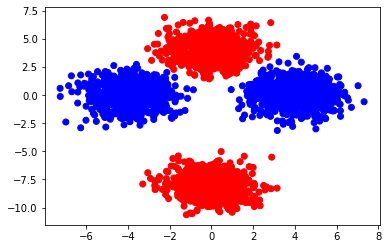

In [39]:
predictions = deep_model.predict(X_test)
plt.scatter(X_test[:,0], X_test[:,1], c=predictions[:,0]>0.5, cmap='bwr')

# Congratulations...
... you've trained a nonlinear classifier with TensorFlow!